In [2]:
# importing helping libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import gc
import subprocess


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# importing data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
## data preprocessing 
# 1. As Score is strongly related to Rating so if Score is High(>=3),then Rating is Pos
df["Ratings"] = np.where(df['Score']>=3 , 1, 0)
df.head()



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Ratings
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


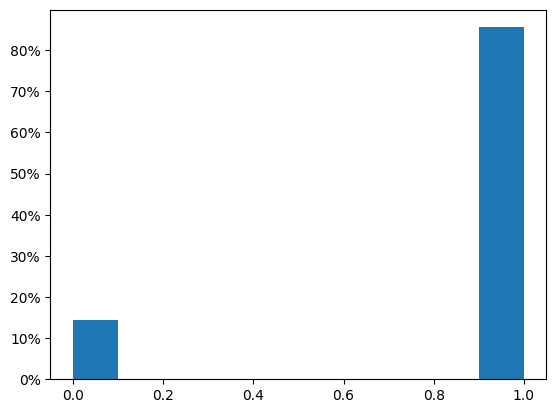

In [7]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#create histogram, using percentages instead of counts
plt.hist(df['Ratings'], weights=np.ones(len(df)) / len(df))

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


 Negative Reviews are very less comapred to Positive Reviews

In [8]:

df[df["UserId"]== "AR5J8UI46CURR"]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Ratings
73790,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
78444,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
138276,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
138316,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1
155048,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,1


As can be seen above the same user has multiple reviews of the with the same values for HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary and Text and on doing analysis it was found that

ProductId=B000HDOPZG was Loacker Quadratini Vanilla Wafer Cookies, 8.82-Ounce Packages (Pack of 8)

ProductId=B000HDL1RQ was Loacker Quadratini Lemon Wafer Cookies, 8.82-Ounce Packages (Pack of 8) and so on

It was inferred after analysis that reviews with same parameters other than ProductId belonged to the same product just having different flavour or quantity. Hence in order to reduce redundancy it was decided to eliminate the rows having same parameters.

The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

In [9]:
#Sorting data according to ProductId in ascending order
sorted_data=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [10]:
#Deduplication of entries
final=df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393933, 11)

Observation:- It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions



In [11]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]


In [12]:
# drop score column as we already use it and making other column Rtings
final=final.drop(['Score'], axis=1)


In [13]:
print(final.shape)

#How many positive and negative reviews are present in our dataset?


(393931, 10)


In [17]:
final['Summary'] = final['Summary'].astype(str)


Text Preprocessing.
1.In my dataset Html tags are there so we have to remove it
2.converting all text into lowercase 
3.Removing URLS 
4.Cprrecting Spelling 
5.Removing Stop Words
6.

In [19]:
# removing Html tags

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
final['Text']=final['Text'].apply(lambda cw : remove_tags(cw))
final.head(1)

# for Summary also
def remove_tags(string):
    result = str(re.sub('<.*?>','',string))
    return result
final['Summary']=final['Summary'].apply(lambda cw : remove_tags(cw))
final.head(1)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Ratings
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1


In [20]:
# converting to lowercase
final['Text'] = final['Text'].apply(str.lower)
final.head(1)
final['Summary'] = final['Summary'].apply(str.lower)


In [21]:
# Removing Punctuation
import string
exclude=string.punctuation
def remove_punc(text):
    for char in exclude:
        text =text.replace(char,"")
    return text
final['Text']=final['Text'].apply(lambda cw : remove_punc(cw))
final.head(1)

# Removing Punctuation for Summary also
import string
exclude=string.punctuation
def remove_punc(text):
    for char in exclude:
        text =text.replace(char,"")
    return text
final['Summary']=final['Summary'].apply(lambda cw : remove_punc(cw))
final.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Ratings
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,good quality dog food,i have bought several of the vitality canned d...,1


In [22]:
# remove urls
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)

# Apply the function to the 'text' column
final['Text'] = final['Text'].apply(lambda cw : remove_urls(cw))

# Display the modified DataFrame
final.head()

# remove urls for Summary
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)

# Apply the function to the 'text' column
final['Summary'] = final['Summary'].apply(lambda cw : remove_urls(cw))

# Display the modified DataFrame
final.head()



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Ratings
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,good quality dog food,i have bought several of the vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,delight says it all,this is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,cough medicine,if you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,great taffy,great taffy at a great price there was a wide...,1


In [23]:
## Removing Stop Words
## Stopwords : Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead
## In stopwords not is also there we are removing it as not is important for review (E.g These cokkies are not good)
 ## we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [24]:
def remove_stop(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)


In [25]:
final['Text']=final['Text'].apply(lambda cw : remove_stop(cw))
final.head(1)


final['Summary']=final['Summary'].apply(lambda cw : remove_stop(cw))
final.head(1)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Ratings
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,good quality dog food,bought several vitality canned dog food produc...,1


In [67]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [68]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
     


In [ ]:
# Combining all the above stundents 
# one paragraph for whole preprocessing
'''from bs4 import BeautifulSoup
from tqdm import tqdm

preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())'''

In [ ]:
new_final=final["Text"]
import numpy as np

# Assuming new_final is a Pandas Series
text_array = new_final.values


In [ ]:
## preprocess summary


In [31]:
## Featurization 
## BAG OF Words
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(max_features=5000)
bow1=cv.fit_transform(final["Text"])


In [32]:
print("the type of count vectorizer ",type(bow))
print("the shape of out text BOW vectorizer ",bow.get_shape())
print("the number of unique words ", bow.get_shape()[1])
## length of vector is equal to number of unique words in  reviews

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (393931, 5000)
the number of unique words  5000


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv2=CountVectorizer(max_features=5000)
bow2=cv2.fit_transform(final["Summary"])


In [36]:
print("the type of count vectorizer ",type(bow2))
print("the shape of out text BOW vectorizer ",bow2.get_shape())
print("the number of unique words ", bow2.get_shape()[1])
## length of vector is equal to number of unique words in  reviews

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (393931, 5000)
the number of unique words  5000


In [ ]:

#cv.vocabulary_

In [29]:
print("the type of count vectorizer ",type(bow))
print("the shape of out text BOW vectorizer ",bow.get_shape())
print("the number of unique words ", bow.get_shape()[1])
## length of vector is equal to number of unique words in  reviews

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (393931, 5000)
the number of unique words  5000


Bi-Grams and N-grams


In [ ]:
# hyper parametere 
# max feature = 5000 means we are considering only top 5000 most ocurring words and rest we are ignoring it
#cv2 = CountVectorizer(max_features=5000)
#bow2=cv2.fit_transform(final["Text"])


In [ ]:
#bow2.get_shape()

In [ ]:
# ngram=(1,2) means we want 1 also and 2 also
#(1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

#cv3 = CountVectorizer(ngram_range=(1,2))
#bow3=cv3.fit_transform(final["Text"])
#bow3.get_shape()

In [ ]:
# min_dif=10,When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold
#cv4 = CountVectorizer(ngram_range=(1,2), min_df=10)
#bow4=cv4.fit_transform(final["Text"])
#bow4.get_shape()

**TF-IDF(Term frequency and Inverse doc frequency)**

In [ ]:
# Term freuency TF(t,d) =no of occurence of term t in review d / total no of terms in review d 
# IDF(t)=log(total no of words in corpus /no of ducment with term t in them)
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf=TfidfVectorizer()
#fit_transform(final["Text"]).toarray()

In [37]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393931 non-null  int64 
 1   ProductId               393931 non-null  object
 2   UserId                  393931 non-null  object
 3   ProfileName             393915 non-null  object
 4   HelpfulnessNumerator    393931 non-null  int64 
 5   HelpfulnessDenominator  393931 non-null  int64 
 6   Time                    393931 non-null  int64 
 7   Summary                 393931 non-null  object
 8   Text                    393931 non-null  object
 9   Ratings                 393931 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.1+ MB


**Word2Vec : Captures Semantic meanings also**

In [49]:
len(final["Ratings"])




393931

In [38]:
num_feats = final[['HelpfulnessNumerator' ,'HelpfulnessDenominator']].values




from scipy import sparse

training_data = sparse.hstack(( num_feats, bow))

training_data.shape



(393931, 5002)

In [39]:
from scipy import sparse

training_data_new = sparse.hstack((training_data ,bow2))

training_data_new.shape

(393931, 10002)

In [50]:
y_train=final["Ratings"]

In [51]:
len(y_train)

393931

In [45]:
from sklearn.ensemble import RandomForestClassifier  # for classification tasks
from sklearn.ensemble import RandomForestRegressor  # for regression tasks
from sklearn.model_selection import train_test_split


In [52]:
X_train, X_test, y_train, y_test = train_test_split(training_data_new, y_train, test_size=0.2, random_state=42)


In [53]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [67]:

feature_importances = clf.feature_importances_
len(feature_importances)

10002

In [70]:
num_features = len(cv.get_feature_names_out())
print("Number of features in BoW:", num_features)


Number of features in BoW: 5000


In [72]:
# Assuming you have trained your classifier and obtained feature importances

# Get the names of the features (words) from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Combine the feature names with their importances and sort them by importance
feature_importance_pairs = [(feature, importance) for feature, importance in zip(feature_names, feature_importances)]
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print the top N important words and their importances
top_n = 100  # Change this number to the desired number of top words
for feature, importance in sorted_feature_importance_pairs[:top_n]:
    print(f"Word: {feature}, Importance: {importance}")


Word: 10, Importance: 0.05660886415472105
Word: 0g, Importance: 0.03632488108550188
Word: options, Importance: 0.024083936384764776
Word: greatest, Importance: 0.007298905225467996
Word: didnt, Importance: 0.006368619332481022
Word: house, Importance: 0.00599324805817477
Word: tax, Importance: 0.005688630425613436
Word: arrive, Importance: 0.005265592652918232
Word: going, Importance: 0.005117099827094626
Word: yeast, Importance: 0.004781212292368717
Word: april, Importance: 0.004644697878698869
Word: women, Importance: 0.004295887466581423
Word: baskets, Importance: 0.004275928522421429
Word: standard, Importance: 0.003997683448201335
Word: product, Importance: 0.003902824094572208
Word: die, Importance: 0.0032867185123253493
Word: de, Importance: 0.0029414907529938805
Word: digest, Importance: 0.0026854171139478267
Word: bbq, Importance: 0.0026580725086563684
Word: mad, Importance: 0.002593507794630793
Word: grocery, Importance: 0.002484125653437713
Word: nutella, Importance: 0.00241

In [55]:
# For classification
y_pred = clf.predict(X_test)

# For regression
#y_pred = reg.predict(X_test)


In [56]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.902382372726465
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66     11401
           1       0.94      0.94      0.94     67386

    accuracy                           0.90     78787
   macro avg       0.80      0.80      0.80     78787
weighted avg       0.90      0.90      0.90     78787

